In [1]:
from traffic.data import sectors

In [2]:
from cartopy.feature import NaturalEarthFeature
from cartopy.crs import PlateCarree

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

default_text = {'ha': 'center',
                'fontname': 'Ubuntu',
                'fontsize': 13,}

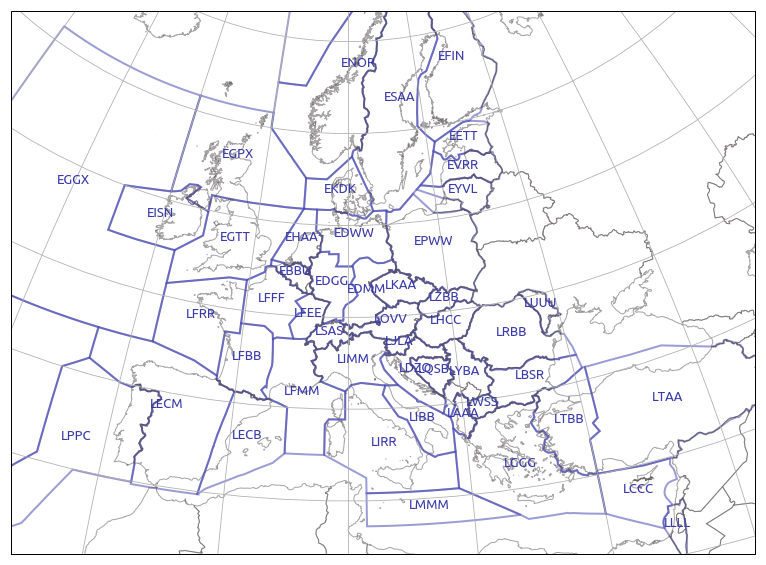

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from cartopy.crs import TransverseMercator

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=TransverseMercator(10, 45))

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-15, 40, 30, 65))

for fir in sectors.search("[EL].*/FIR"):
    fir.plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)
    if fir.name not in ['ENOB', 'LPPO']:
        fir.annotate(ax, color='#3a3aaa', **default_text)

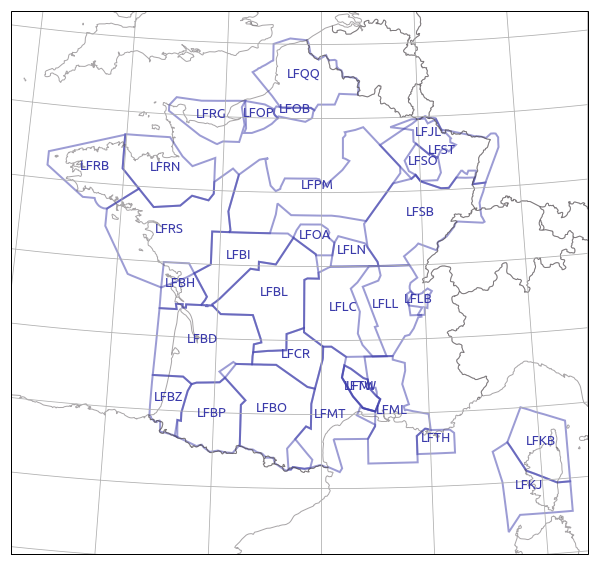

In [4]:
# https://github.com/xooolive/cartotools
from cartotools.crs import Lambert93

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=Lambert93())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-10, 15, 40, 51))

for tma in sectors.search(f"LF.*/TMA"):
    tma.plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)
    tma.annotate(ax, s=tma.name[:-3], **default_text, color='#3a3aaa')

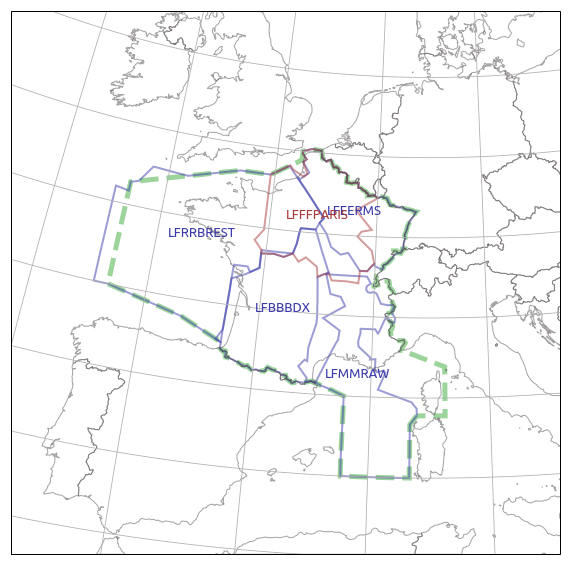

In [5]:
from cartopy.crs import EuroPP
from operator import attrgetter
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-10, 15, 35, 55))

sectors['LFFF/UIR'].plot(ax, edgecolor="#3aaa3a", lw=5, alpha=.5, linestyle='dashed')

for name in ['LFBB', 'LFEE', 'LFRR', 'LFMM']:
    sector = max(sectors.search(f"{name}.*/SECTOR_C"), key=attrgetter('area'))
    sector.plot(ax, edgecolor="#3a3aaa", lw=2, alpha=.5)
    sector.annotate(ax, **default_text, color="#3a3aaa")
    
sector = max(sectors.search(f"LFFF.*/SECTOR_C"), key=attrgetter('area'))
sector.plot(ax, edgecolor="#aa3a3a", lw=2, alpha=.5)
sector.annotate(ax, **default_text, color="#aa3a3a")


EDGG/FIR
-inf 245.0


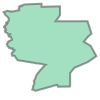

EDMM/FIR
-inf 245.0


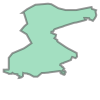

EDWW/FIR
-inf 245.0


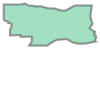

In [6]:
from IPython.display import display

for s in sectors.search('ED.*/FIR'):
    display(s)